# Get All Tatup Abstracts - Only with WebScraping

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

# Get issue URLs from the Tatup archive

In [85]:
ArchiveURL="https://www.tatup.de/index.php/tatup/issue/archive"

Start_year=2016
Start_issue=0

source = requests.get(ArchiveURL)
soup = BeautifulSoup(source.text, 'lxml')
a=soup("a",{"class":"title"})
a={i.next_element.next_element.next_element.text.strip().split("No.")[1]:i["href"] for i in a}
print(len(a))
IssuePages=list({a[i] for i in a if int(i[-5:-1])>Start_year and int(i[1])>=Start_issue})
print(len(IssuePages))

IssuePages

98
18


['https://www.tatup.de/index.php/tatup/issue/view/6',
 'https://www.tatup.de/index.php/tatup/issue/view/172',
 'https://www.tatup.de/index.php/tatup/issue/view/170',
 'https://www.tatup.de/index.php/tatup/issue/view/9',
 'https://www.tatup.de/index.php/tatup/issue/view/96',
 'https://www.tatup.de/index.php/tatup/issue/view/175',
 'https://www.tatup.de/index.php/tatup/issue/view/4',
 'https://www.tatup.de/index.php/tatup/issue/view/167',
 'https://www.tatup.de/index.php/tatup/issue/view/168',
 'https://www.tatup.de/index.php/tatup/issue/view/174',
 'https://www.tatup.de/index.php/tatup/issue/view/169',
 'https://www.tatup.de/index.php/tatup/issue/view/7',
 'https://www.tatup.de/index.php/tatup/issue/view/5',
 'https://www.tatup.de/index.php/tatup/issue/view/8',
 'https://www.tatup.de/index.php/tatup/issue/view/173',
 'https://www.tatup.de/index.php/tatup/issue/view/171',
 'https://www.tatup.de/index.php/tatup/issue/view/166',
 'https://www.tatup.de/index.php/tatup/issue/view/3']

# Get all articles & abstracts

In [182]:
def get_articles(IssueLink):
    source = requests.get(IssueLink)
    soup = BeautifulSoup(source.text, 'lxml')
    a=soup("a",{"class":"obj_galley_link file"})
    a=[i["href"] for i in a]
    return a

IssueLink="https://www.tatup.de/index.php/tatup/issue/view/166"
    
articles=get_articles(IssueLink)
articles

['https://www.tatup.de/index.php/tatup/article/view/6786/11449',
 'https://www.tatup.de/index.php/tatup/article/view/6787/11451',
 'https://www.tatup.de/index.php/tatup/article/view/6789/11454',
 'https://www.tatup.de/index.php/tatup/article/view/6790/11456',
 'https://www.tatup.de/index.php/tatup/article/view/6791/11458',
 'https://www.tatup.de/index.php/tatup/article/view/6792/11460',
 'https://www.tatup.de/index.php/tatup/article/view/6793/11462',
 'https://www.tatup.de/index.php/tatup/article/view/6794/11464',
 'https://www.tatup.de/index.php/tatup/article/view/6795/11466',
 'https://www.tatup.de/index.php/tatup/article/view/6796/11468',
 'https://www.tatup.de/index.php/tatup/article/view/6797/11470',
 'https://www.tatup.de/index.php/tatup/article/view/6798/11472',
 'https://www.tatup.de/index.php/tatup/article/view/6799/11474',
 'https://www.tatup.de/index.php/tatup/article/view/6800/11476',
 'https://www.tatup.de/index.php/tatup/article/view/6801/11478',
 'https://www.tatup.de/in

In [174]:
def get_abstract_from_HTML(ArticleURL,language="en"):
    import re
    r=requests.get(ArticleURL)
    soup = BeautifulSoup(r.text, 'lxml')
    url=soup.find("iframe")["src"]
    querystring = {"inline":"1"}
 
    # get iFrame
    try:
        response = requests.request("GET", url, params=querystring)
        soup = BeautifulSoup(response.text, 'lxml') 
        abstract=soup("p",{"class":"abstract"})
        text=" ".join([re.sub(r'\([^)]*\)', '', i.text) for i in abstract])
        from langdetect import detect
        lang=detect(text)

        if lang==language:
            return text

        else:
            abstract=soup.find("div",{"class":"translation"})
            p=abstract("p")
            p=[i for i in p if len(i.text.split(" "))>20]
            text=" ".join([re.sub(r'\([^)]*\)', '', i.text) for i in p])
            lang=detect(text)
            if lang==language:
                return text
    except:
        print(ArticleURL.rsplit("view/",1)[-1], "no abstract", end=". ")
        
ArticleURL=articles[6]

get_abstract_from_HTML(ArticleURL,language="en")

'This article discusses the sustainability of autonomous driving. The empirical analyses presented in this article are based on data of the first TechnikRadar, a survey on the perception of technology with representative for the German population. While most of the literature on autonomous driving focuses on expert views on this issue, this paper adds the perspective of the general public. Although autonomous driving as a socio-technical system is far from being fully developed, making it impossible to assess the ecological effects of its applications, the TechnikRadar allows studying the perceived social sustainability of autonomous driving. At the moment, public perception of autonomous driving is dominated by fears regarding safety, the protection of data produced by the system, and the system’s vulnerability, in particular to attacks by cyber criminals.'

In [186]:
## Run through all issues & articles

TatupDict={}

for issue in IssuePages:
    articles=get_articles(issue)
    print(issue)
    for article in articles:
        abstract_DE=get_abstract_from_HTML(article,language="de")
        abstract_EN=get_abstract_from_HTML(article,language="en")
        TatupDict[article]=[abstract_DE,abstract_EN]

https://www.tatup.de/index.php/tatup/issue/view/6
137/185 no abstract. 137/185 no abstract. 139/183 no abstract. 139/183 no abstract. 148/204 no abstract. 150/206 no abstract. 150/206 no abstract. 149/208 no abstract. 149/208 no abstract. 151/210 no abstract. 151/210 no abstract. 152/212 no abstract. 152/212 no abstract. 153/214 no abstract. 153/214 no abstract. 154/216 no abstract. 154/216 no abstract. 155/218 no abstract. 155/218 no abstract. https://www.tatup.de/index.php/tatup/issue/view/172
6949/11690 no abstract. 6949/11690 no abstract. 6950/11692 no abstract. 6950/11692 no abstract. 6959/11709 no abstract. 6959/11709 no abstract. 6960/11711 no abstract. 6960/11711 no abstract. 6961/11713 no abstract. 6961/11713 no abstract. 6962/11715 no abstract. 6962/11715 no abstract. 6963/11717 no abstract. 6963/11717 no abstract. 6964/11719 no abstract. 6964/11719 no abstract. https://www.tatup.de/index.php/tatup/issue/view/170
6887/11605 no abstract. 6887/11605 no abstract. 6889/11607 no a

6786/11449 no abstract. 6786/11449 no abstract. 6787/11451 no abstract. 6787/11451 no abstract. 6795/11466 no abstract. 6796/11468 no abstract. 6796/11468 no abstract. 6797/11470 no abstract. 6797/11470 no abstract. 6798/11472 no abstract. 6798/11472 no abstract. 6799/11474 no abstract. 6799/11474 no abstract. 6800/11476 no abstract. 6800/11476 no abstract. 6801/11478 no abstract. 6801/11478 no abstract. 6802/11480 no abstract. 6802/11480 no abstract. 6803/11482 no abstract. 6803/11482 no abstract. 6804/11484 no abstract. 6804/11484 no abstract. https://www.tatup.de/index.php/tatup/issue/view/3
38/82 no abstract. 27/89 no abstract. 27/89 no abstract. 28/88 no abstract. 28/88 no abstract. 29/83 no abstract. 29/83 no abstract. 30/84 no abstract. 30/84 no abstract. 31/85 no abstract. 31/85 no abstract. 37/87 no abstract. 37/87 no abstract. 

In [239]:
df=pd.DataFrame(TatupDict).T
df.columns=["abstract_de","abstract_en"]

#df.to_excel("2023-05-11_TATuP abstracts.xlsx", engine='xlsxwriter')

df=df[df["abstract_de"].apply(lambda x: x!=None)]
df

,abstract_de,abstract_en
https://www.tatup.de/index.php/tatup/article/view/128/188,Dieses TATuP-Thema präsentiert erste Perspekti...,This special topic of TATuP presents a collect...
https://www.tatup.de/index.php/tatup/article/view/133/190,Automatisiertes Fahren stößt derzeit noch auf ...,Automated driving is currently viewed with gre...
https://www.tatup.de/index.php/tatup/article/view/132/192,"In dieser Studie wird abgeschätzt, welche gesa...",This study estimates the macroeconomic cost sa...
https://www.tatup.de/index.php/tatup/article/view/131/194,"Das automatisierte Fahren hat das Potenzial, u...",Automated driving has the potential to fundame...
https://www.tatup.de/index.php/tatup/article/view/127/196,Dieser Artikel thematisiert die Nachhaltigkeit...,This article discusses the sustainability of a...
...,...,...
https://www.tatup.de/index.php/tatup/article/view/26/95,Das Internet weckte Erwartungen auf offenen un...,The advent of the Internet gave rise to the ex...
https://www.tatup.de/index.php/tatup/article/view/33/96,Der Buchdruck ermöglichte die Ausdifferenzieru...,The printing press played a major role in the ...
https://www.tatup.de/index.php/tatup/article/view/34/97,"In Technikvisionen, Entwicklungsleitbildern un...","Visions of technology, guiding visions, and fu..."
https://www.tatup.de/index.php/tatup/article/view/35/98,Mit der europäischen Datenschutz-Grundverordnu...,With the European General Data Protection Regu...


# NLP

In [240]:
from OwnLib import nlp

df=nlp.NLP_Pipeline(df, sentiment=False, language="de",column="abstract_de",translate=False)

cleaning done.
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
language detection done.
pure english text done. Next: Token & Lemmatizing.
Token & Lemmatizing done. Next: Remove Stopwords.


In [213]:
df.to_json("2023-05-11_TATuP_Abstracts_nlp.json")

In [2]:
df=pd.read_json("2023-05-11_TATuP_Abstracts_nlp.json")

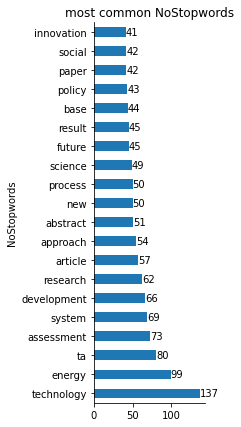

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

n=20

column='NoStopwords'
BigList=df[column]

flatTuppleList=[y.lower() for x in BigList for y in x]
a_counter = Counter(flatTuppleList)
c = a_counter.most_common(n)
hs=pd.DataFrame(c,columns=[column,"count"])
ax=hs.set_index(column).plot.barh(figsize=(2,5*n*0.07),legend=False,title="most common "+column)
ax.bar_label(ax.containers[0])

from seaborn import despine

despine(left=False, bottom=False)

plt.savefig(f"Tatup_{column}_abstracts_en.pdf",bbox_inches="tight")

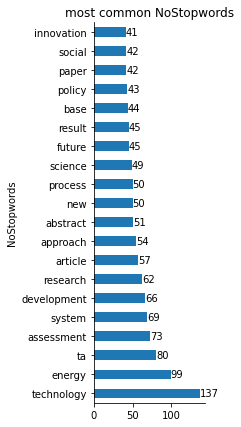

In [237]:
from collections import Counter
import matplotlib.pyplot as plt

n=20

column='NoStopwords'
BigList=df[column]

flatTuppleList=[y.lower() for x in BigList for y in x]
a_counter = Counter(flatTuppleList)
c = a_counter.most_common(n)
hs=pd.DataFrame(c,columns=[column,"count"])
ax=hs.set_index(column).plot.barh(figsize=(2,5*n*0.07),legend=False,title="most common "+column)
ax.bar_label(ax.containers[0])

from seaborn import despine

despine(left=False, bottom=False)

plt.savefig(f"Tatup_{column}_abstracts_en.pdf",bbox_inches="tight")

In [223]:
with open("2023-05-11_TATuP_Abstracts_Lemmata_de.txt","w") as w:
    w.writelines(", ".join(flatTuppleList))

In [224]:
with open("2023-05-11_TATuP_Abstracts_Lemmata_de.txt","r") as w:
    x=w.read()
len(x.split(", "))

9367

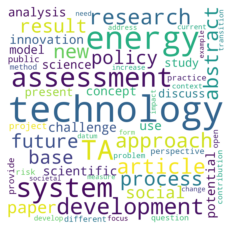

In [24]:

%load_ext autoreload
%autoreload 2
from OwnLib import analysis
flatTuppleList=[y for x in df.NoStopwords.values for y in x]
analysis.make_wordcloud(flatTuppleList,Mostcommon=250, font_size=(30,220),max_words=250,filename="TA_wordcloud_abstract_en",startBy=0)

In [13]:
df.abstract_de[:10]

https://www.tatup.de/index.php/tatup/article/view/128/188       Dieses TATuP-Thema präsentiert erste Perspekti...
https://www.tatup.de/index.php/tatup/article/view/133/190       Automatisiertes Fahren stößt derzeit noch auf ...
https://www.tatup.de/index.php/tatup/article/view/132/192       In dieser Studie wird abgeschätzt, welche gesa...
https://www.tatup.de/index.php/tatup/article/view/131/194       Das automatisierte Fahren hat das Potenzial, u...
https://www.tatup.de/index.php/tatup/article/view/127/196       Dieser Artikel thematisiert die Nachhaltigkeit...
https://www.tatup.de/index.php/tatup/article/view/129/198       Die Vision eines drohnenbasierten Lieferverkeh...
https://www.tatup.de/index.php/tatup/article/view/135/200       Technikfolgenabschätzung  verwendet häufig vor...
https://www.tatup.de/index.php/tatup/article/view/134/202       Das Integrative Konzept nachhaltiger Entwicklu...
https://www.tatup.de/index.php/tatup/article/view/148/204                               

In [104]:
%load_ext autoreload
%autoreload 2
from OwnLib import analysis


#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="Energie",words_before=(0,10),words_after=(0,10),n_examples=(2,100))
def text_context(column=["abstract_en","abstract_de","NoStopwords"],search_word="sustainable"
                 ,words_before=1,words_after=1,n_examples=5):
    results=df[column].dropna().apply(analysis.Keyword_context,
                                      search_word=search_word.lower(),
                                      context=(words_before,words_after))
    results=[r for r in results.to_list() if r!=""][:n_examples]
    [print(r) for r in results]

    
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


interactive(children=(Dropdown(description='column', options=('abstract_en', 'abstract_de', 'NoStopwords'), va…